<a href="https://colab.research.google.com/github/deletella01/Churn_prediction_web_app/blob/main/Model%20building/Churn_Prediction_and_Customer_Retention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Churn Prediction Analysis

In [4]:
#https://drive.google.com/file/d/1DhvYzzA9HfRrz_UL_sRFK29O0aRHOKY2/view?usp=drive_link

In [1]:
!pip install streamlit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 75.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.9 MB/s eta 0:00:00


In [3]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import gdown

# Replace 'YOUR_FILE_ID' with the actual file ID from the shareable link.
file_id = '1DhvYzzA9HfRrz_UL_sRFK29O0aRHOKY2'

# Specify the destination file path and name.
output = 'churn_data.csv'  # You can change the file name and extension.

# Download the file.
gdown.download(f'https://drive.google.com/uc?id={"1DhvYzzA9HfRrz_UL_sRFK29O0aRHOKY2"}', output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1DhvYzzA9HfRrz_UL_sRFK29O0aRHOKY2
To: /content/churn_data.csv
100%|██████████| 978k/978k [00:00<00:00, 92.1MB/s]


'churn_data.csv'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import streamlit as st
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sn
import pickle
import warnings
warnings.filterwarnings('ignore')

In [6]:
# Import the data and view the tranpose of the first 5 rows
df = pd.read_csv('churn_data.csv')  # Use the same filename you specified in the download step.
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Cleaning the Data

In [7]:
# To Clean the data, I will remove the ID column and other irrelevant characters in the data.
# I also change some feature responses to match grouping
# This makes the information contained the dataset easy to transform into computer readable data.
def preprocess(df):
  if 'customerID' in df.columns:
    df.drop('customerID',axis='columns',inplace=True)
  else:
    print("No Customer ID")
  df1 = df[df.TotalCharges!=' ']
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)
  df1.replace('No internet service','No',inplace=True)
  df1.replace('No phone service','No',inplace=True)
  return df1

In [8]:
# Here I call the 'preprocess' function on the dataset
df1 = preprocess(df)

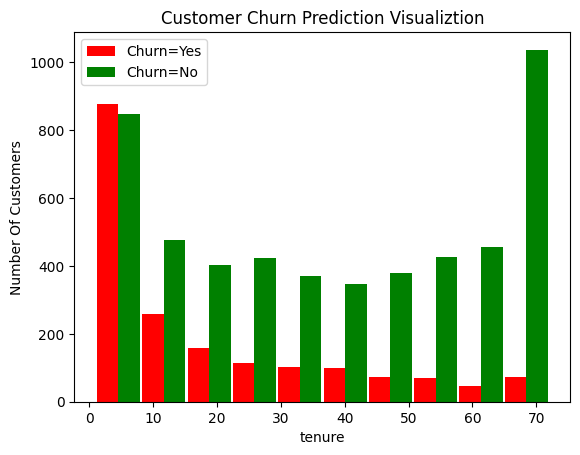

In [9]:
# Next, I perform data visualization on the dataset
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

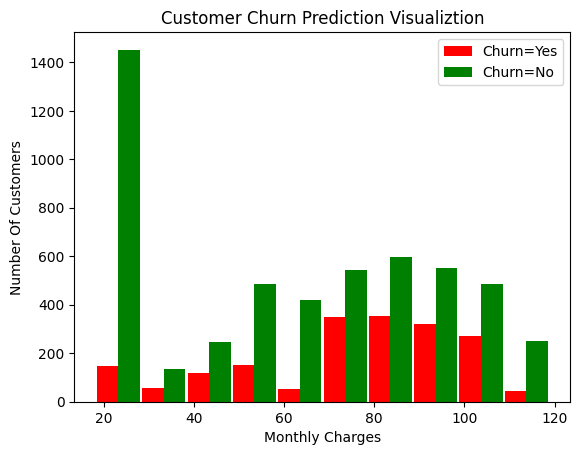

In [10]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

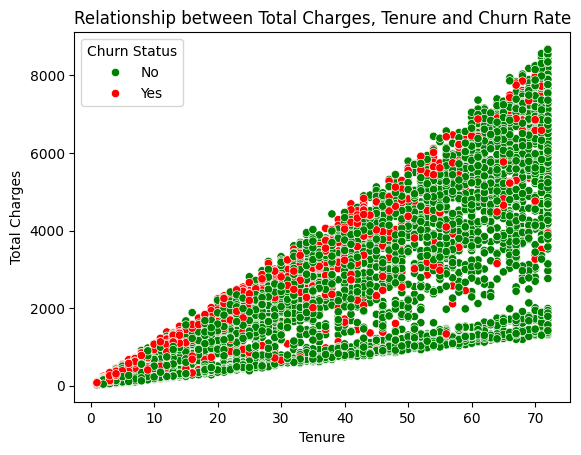

In [11]:
sns.scatterplot(x="tenure", y="TotalCharges", hue="Churn",
                data=df1, palette={"Yes": "red", "No": "green"})

# Customize the plot
plt.title("Relationship between Total Charges, Tenure and Churn Rate")
plt.xlabel("Tenure")
plt.ylabel("Total Charges")
plt.legend(title="Churn Status")

# Show the plot
plt.show()

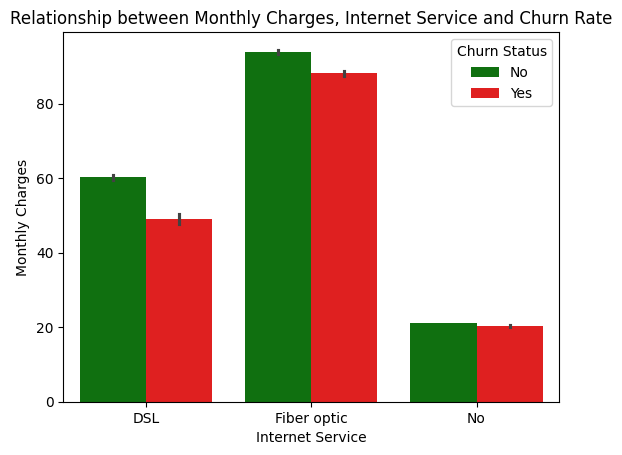

In [12]:
sns.barplot(x="InternetService", y="MonthlyCharges", hue="Churn",
                data=df1, palette={"Yes": "red", "No": "green"})

# Customize the plot
plt.title("Relationship between Monthly Charges, Internet Service and Churn Rate")
plt.xlabel("Internet Service")
plt.ylabel("Monthly Charges")
plt.legend(title="Churn Status")

# Show the plot
plt.show()

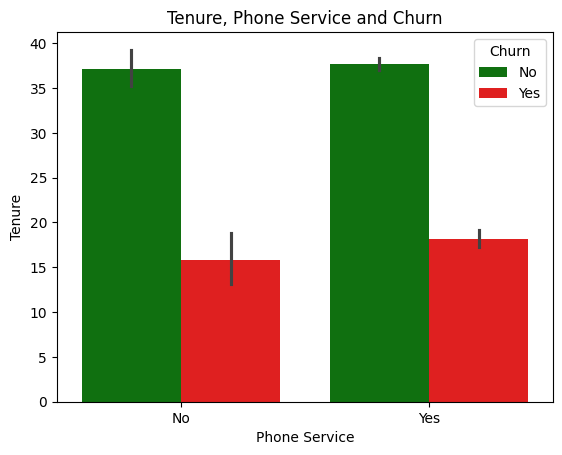

In [13]:
# Plot the categorical plot
sns.barplot(x="PhoneService", y="tenure", hue="Churn", data=df1,
            palette={"Yes": "red", "No": "green"})

# Customize the plot
plt.title("Tenure, Phone Service and Churn")
plt.xlabel("Phone Service")
plt.ylabel("Tenure")
plt.legend(title="Churn")

# Show the plot
plt.show()

In [14]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [15]:
# Next, I create a function to transform the data to be readable by machine learning algorithm
def trans4m(df1):
  yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
  for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
  df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])

  bool_cols = df2.select_dtypes(include=[bool]).columns
  df2[bool_cols] = df2[bool_cols].astype('uint8')

  cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
  scaler = MinMaxScaler()
  df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
  return df2

In [16]:
# Next I call the function to transform the dataset
df2 = trans4m(df1)

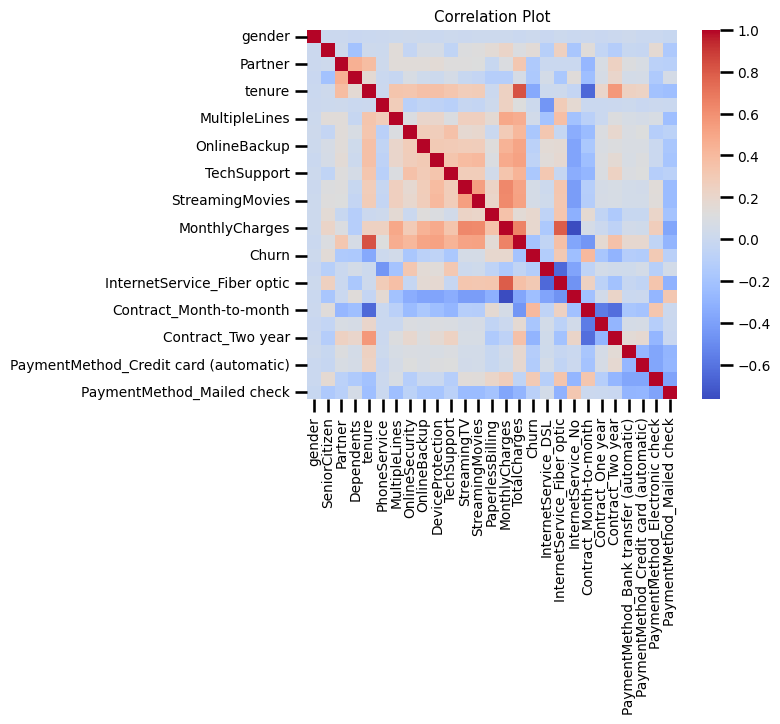

In [17]:
# This heat map shows a correllation plot for features of the dataset
sns.set_context("talk", font_scale=0.6, rc={"figure.figsize": (15, 12)})  # Set figure size to 12x8 inches
coorr = df2.corr()
sns.heatmap(coorr, cmap="coolwarm", square=True)
plt.title("Correlation Plot")
plt.show()

In [18]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [19]:
def train_model(X, y):

  model = keras.Sequential([
          keras.layers.Dense(26, input_shape=(26,), activation='relu'),
          keras.layers.Dense(15, activation='relu'),
          keras.layers.Dense(1, activation='sigmoid')])

# opt = keras.optimizers.Adam(learning_rate=0.01)
  model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy'])
  model.fit(X, y, epochs=100)
  return model
model = train_model(X_train, y_train)

Epoch 1/100
176/176 [==============================] - 2s 4ms/step - loss: 0.5019 - accuracy: 0.7577
Epoch 2/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4262 - accuracy: 0.8002
Epoch 3/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4181 - accuracy: 0.8037
Epoch 4/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4133 - accuracy: 0.8044
Epoch 5/100
176/176 [==============================] - 1s 4ms/step - loss: 0.4111 - accuracy: 0.8071
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4089 - accuracy: 0.8075
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4069 - accuracy: 0.8098
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4047 - accuracy: 0.8089
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4037 - accuracy: 0.8121
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4023 - accura

In [20]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.7640


[0.49617800116539, 0.7640369534492493]

In [21]:
yp = model.predict(X_test)
yp[:5]

44/44 [==============================] - 0s 2ms/step


array([[0.47134715],
       [0.5686921 ],
       [0.01587881],
       [0.84670025],
       [0.33316323]], dtype=float32)

In [22]:
from tensorflow.keras.models import load_model, save_model

# Save the model
model.save('churn_model.h5')

# Load the model
#loaded_model = load_model('churn_model.h5')

In [23]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [24]:
y_pred[:10]

[0, 1, 0, 1, 0, 1, 0, 0, 0, 0]

In [25]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [26]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83       999
           1       0.60      0.58      0.59       408

    accuracy                           0.76      1407
   macro avg       0.71      0.71      0.71      1407
weighted avg       0.76      0.76      0.76      1407



Text(88.08333333333333, 0.5, 'Truth')

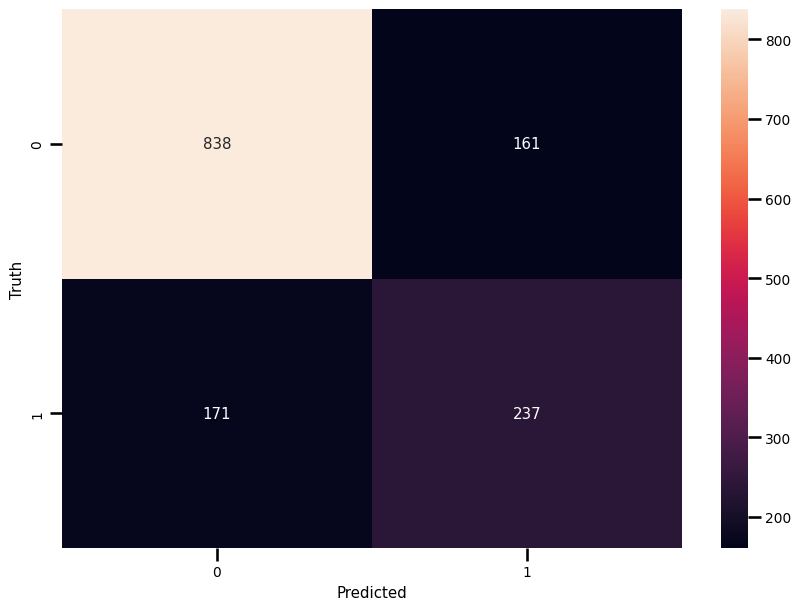

In [27]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [28]:
round((862+229)/(862+229+137+179),2)

0.78

In [29]:
round(862/(862+179),2)

0.83

In [30]:
round(229/(229+137),2)

0.63

In [31]:
round(862/(862+137),2)

0.86

In [32]:
round(229/(229+179),2)

0.56

In [33]:
print(pd.__version__)

2.0.3


In [34]:
print(st.__version__)

1.36.0


In [35]:
import sklearn

In [36]:
sklearn.__version__

'1.2.2'

## APP Deployment

In [41]:
%%writefile app.py
import streamlit as st
import pandas as pd
import pickle
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings('ignore')

st.write("""
# Churn Prediction and Customer Retention App
Telco Systems is a global leader in telecommunications, with over 40 years of experience in the design and development of high-performance network communications solutions.
With its advanced software and hardware solutions, Telco Systems provides a revolutionary approach to the network edge for service providers, allowing them to offer the highest levels of service innovation to customers.

This app aims to predicts consumer behavior. The objective is to create a targeted client retention program by analyzing all pertinent customer data.

Data obtained from [Kaggle Library](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)
""")

st.sidebar.header("User Input Features")

def user_input_Features():
  gender = st.sidebar.selectbox('Gender', ('Male', 'Female'))
  seniorCitizen = st.sidebar.selectbox('Senior Citizen', ('Yes', 'No'))
  partner = st.sidebar.selectbox('Partner',('Yes', 'No'))
  dependents = st.sidebar.selectbox('Dependents',('Yes', 'No'))
  tenure = st.sidebar.slider('Tenure (Months))', 0, 75, 20)
  PhoneService = st.sidebar.selectbox('Phone Service',('Yes', 'No'))
  MultipleLines = st.sidebar.selectbox('Multiple Lines',('Yes', 'No'))
  OnlineSecurity = st.sidebar.selectbox('Online Security',('Yes', 'No'))
  OnlineBackup = st.sidebar.selectbox('Online Backup',('Yes', 'No'))
  DeviceProtection = st.sidebar.selectbox('Device Protection',('Yes', 'No'))
  TechSupport = st.sidebar.selectbox('Tech Support',('Yes', 'No'))
  StreamingTV = st.sidebar.selectbox('Streaming TV',('Yes', 'No'))
  StreamingMovies = st.sidebar.selectbox('Streaming Movies',('Yes', 'No'))
  PaperlessBilling = st.sidebar.selectbox('Paperless Billing',('Yes', 'No'))
  MonthlyCharges = st.sidebar.slider('Monthly Charge ($)', 18, 118, 70)
  TotalCharges = st.sidebar.slider('Total Charge ($)', 18, 8685, 1000)

  InternetService = st.sidebar.selectbox('Internet Service',('DSL','Fiber Optic','No'))
  Contract = st.sidebar.selectbox('Contract', ('Month-to-month', 'One year', 'Two year'))
  PaymentMethod = st.sidebar.selectbox('Payment Method', ('Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)'))

  data = {'gender' : gender,
          'seniorCitizen' : seniorCitizen,
          'Partner' : partner,
          'Dependents' : dependents,
          'tenure' : pd.to_numeric(tenure),
          'PhoneService' : PhoneService,
          'MultipleLines' : MultipleLines,
          'OnlineSecurity' : OnlineSecurity,
          'OnlineBackup' : OnlineBackup,
          'DeviceProtection' : DeviceProtection,
          'TechSupport' : TechSupport,
          'StreamingTV' : StreamingTV,
          'StreamingMovies' : StreamingMovies,
          'PaperlessBilling' : PaperlessBilling,
          'MonthlyCharges' : pd.to_numeric(MonthlyCharges),
          'TotalCharges' : pd.to_numeric(TotalCharges),
          'InternetService' : InternetService,
          'Contract' : Contract,
          'PaymentMethod' : PaymentMethod}
  features = pd.DataFrame(data, index=[0])
  return features

d = user_input_Features()

st.subheader('User Input Parameters')
st.write(d)


def data_trans4m(df):
  yes_no_columns = ['Partner', 'seniorCitizen','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
  for col in yes_no_columns:
    df[col].replace({'Yes': 1,'No': 0},inplace=True)

  df['gender'].replace({'Female':1,'Male':0},inplace=True)

  df2 = pd.get_dummies(data=df, columns=['InternetService','Contract','PaymentMethod'])

  bool_cols = df2.select_dtypes(include=[bool]).columns
  df2[bool_cols] = df2[bool_cols].astype('uint8')

  cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
  from sklearn.preprocessing import MinMaxScaler
  scaler = MinMaxScaler()
  df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])
  return df2

d2 = data_trans4m(d)

if 'InternetService_DSL' in d2.columns:
  d2['InternetService_Fiber optic'] = 0
  d2['InternetService_No'] = 0
elif 'InternetService_Fiber_optic' in d2.columns:
  d2['InternetService_DSL'] = 0
  d2['InternetService_No'] = 0
else:
  d2['InternetService_DSL'] = 0
  d2['InternetService_Fiber optic'] = 0

if 'Contract_Month-to-month' in d2.columns:
  d2['Contract_One year'] = 0
  d2['Contract_Two year'] = 0
elif 'Contract_One year' in d2.columns:
  d2['Contract_Month-to-month'] = 0
  d2['Contract_Two year'] = 0
else:
  d2['Contract_Month-to-month'] = 0
  d2['Contract_One year'] = 0

if 'PaymentMethod_Bank transfer (automatic)' in d2.columns:
  d2['PaymentMethod_Credit card (automatic)'] = 0
  d2['PaymentMethod_Electronic check'] = 0
  d2['PaymentMethod_Mailed check'] = 0
elif 'PaymentMethod_Credit card (automatic)' in d2.columns:
  d2['PaymentMethod_Bank transfer (automatic)'] = 0
  d2['PaymentMethod_Electronic check'] = 0
  d2['PaymentMethod_Mailed check'] = 0
elif 'PaymentMethod_Electronic check' in d2.columns:
  d2['PaymentMethod_Bank transfer (automatic)'] = 0
  d2['PaymentMethod_Credit card (automatic)'] = 0
  d2['PaymentMethod_Mailed check'] = 0
else:
  d2['PaymentMethod_Bank transfer (automatic)'] = 0
  d2['PaymentMethod_Credit card (automatic)'] = 0
  d2['PaymentMethod_Electronic check'] = 0

# Reads in saved classification model
load_model = load_model('churn_model.h5')


# Apply model to make predictions
prediction = load_model.predict(d2)


st.subheader('Prediction')
if prediction > 0.5:
  st.write('YES')
  st.write('Customer will leave the company')
else:
  st.write('NO')
  st.write('Customer will stay with the company')


Overwriting app.py


In [ ]:
# Now I will run the app on a web platform just the way a preview of apps in development can be run locally on a device

In [42]:
!wget -q -O - ipv4.icanhazip.com

34.23.246.45


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.23.246.45:8501

npx: installed 22 in 2.49s
your url is: https://rude-beers-thank.loca.lt
